This assignment serves three purposes:

--> Introducing you to RandomForestClassifier
--> Trying to implement Dense CNN model using the skills you gained till now

This assingemnt might not contain a line to line explaination of the task to be performed. You got to start visiting the documentations or any example online to help you out with queries like syntax and parameters.

The third and the most crucial purpose of all is helping you understand how to implement different models for the same task.
Here, we have given you the task of hand-written digit classification on MNIST dataset, first using RandomForestClassifier and second using Dense CNN and if you wish, you could also try to implement this task from the model of previous assingment with of-course a little bit of tweaking. 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [6]:
from scipy.io import loadmat
# set path of dataset to mnist_path varaible and loadmat() it to mnist_raw

mnist_raw = loadmat("mnist-original.mat")

mnist ={ "data":mnist_raw["data"].T,"target":mnist_raw["label"][0],
         "COL_NAMES":["label","data"],"DESCR": "mldata.org dataset:mnist-original",
       }

In [9]:
# store data in X and target in y

X = mnist["data"]
y = mnist["target"]
#Our data is expected to has 70000 instances(rows) and 784 features(columns)

print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(y.shape))

Shape of X:(70000, 784)
Shape of Y:(70000,)


In [16]:
import matplotlib.pyplot as plt

In [24]:
X[0].shape
y[0]

0.0

Text(0.5, 1.0, '0')

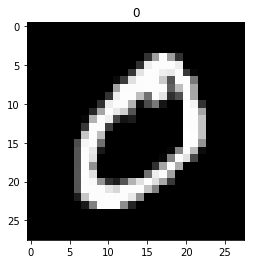

In [26]:
# pick any example from z, rehshape it to 28x28 type and display it using matplot
plt.imshow(X[0].reshape(28,28),cmap="gray")
plt.title(int(y[0]))



In [51]:
# To randomize out data set we have to shuffle it
#np.random.permutation() gives us an np.array of numbers in range given range
#  reshuffle X and y
x = np.random.permutation(70000)
y = y[x]
X = X[x]

Text(0.5, 1.0, '8')

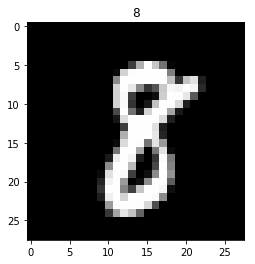

In [52]:
plt.imshow(X[0].reshape(28,28),cmap="gray")
plt.title(int(y[0]))


In [65]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [142]:
# we are dividing the data in 60,000 and 10,000 for training and testing
from sklearn.model_selection import train_test_split as tt
x_train, x_test , y_train , y_test = tt(X,y,test_size=1/7,random_state=0)


In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

#create a rondom forest classifier with random state of 42 and fit your train varaibles 
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(x_train,y_train)




In [67]:
# predict your train X varariable and find mean_absolute error it should be around 0.00333
# repeat the same for test X it should be around 0.205
mean_absolute_error(y_train,rf.predict(x_train))

0.0

In [68]:
mean_absolute_error(y_test,rf.predict(x_test))

0.1215

In [ ]:
# Now that RandonForest has been explored, we'll be implementing Dense CNN model

In [69]:
# First order of business is creating the model
# for that purpose we've already imported the required things 
# your task is to use the above imported modules and whatever skills you have harnessed and build a model from scratch
# JUST A REMINDER , WE TRIED TO INTRODUCE YOU ALL WITH MOST OF THE LIBRARIES WHICH WE USE ON A DAILY BASIS
# ONE OF THEM IS KERAS USING WHICH YOU'LL IMPLEMENT THIS LAST ASSINGMENT 
# BUT DON'T WORRY THAT ITS NEW. THE CONCEPTS WHICH YOU ALL HAVE GAINED UPTIL NOW WILL ONLY BE USED 
# DON'T PANIC THAT YOU DON'T KNOW KERAS
# JUST GIVE IT A TRY. CREATING A MODEL IS SIMILAR TO THAT IN PYTORCH.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

# keras initializer


In [107]:
# model
model = Sequential()

In [143]:
x_train , x_test = x_train/255.0 , x_test/255.0
x_tr = x_train.reshape(-1,28,28,1)
x_te = x_test.reshape(-1,28,28,1)

x_tr.shape[1:]

(28, 28, 1)

0.0

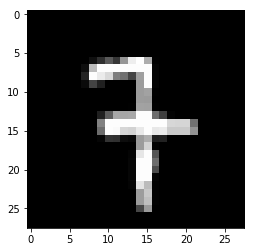

In [145]:
plt.imshow(x_train[0].reshape(28,28),cmap="gray")

x_tr.min()

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [109]:
model.add(Conv2D(64 , (3,3) , input_shape = x_tr.shape[1:] ))

In [110]:
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Conv2D(64 , (3,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

In [111]:
model.add(Flatten())
model.add(Dense(64))


In [113]:
model.add(Activation('relu'))


In [115]:
model.add(Dense(10, activation='softmax'))

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [149]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [151]:
# after creating the model compile it with proper optimizer and loss function 
# You can refer to any keras model training for your reference 


In [ ]:
# Fit your train datasets


In [ ]:
# After fitting try your model with test dataset
# see the accuracy


In [ ]:
# Understand how and where to use which model and jot down your observations in a text file in the github repository.

In [146]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [150]:

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_tr, y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_data=(x_te, y_test))
score = model.evaluate(x_te, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 331s 6ms/step - loss: 0.1701 - acc: 0.9465 - val_loss: 0.0590 - val_acc: 0.9827
Epoch 2/10
60000/60000 [==============================] - 331s 6ms/step - loss: 0.0417 - acc: 0.9870 - val_loss: 0.0416 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 334s 6ms/step - loss: 0.0259 - acc: 0.9921 - val_loss: 0.0345 - val_acc: 0.9904
Epoch 4/10
60000/60000 [==============================] - 333s 6ms/step - loss: 0.0171 - acc: 0.9945 - val_loss: 0.0413 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 330s 6ms/step - loss: 0.0109 - acc: 0.9966 - val_loss: 0.0372 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 357s 6ms/step - loss: 0.0073 - acc: 0.9980 - val_loss: 0.0389 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 388s 6ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 0.0421 - 